In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
%matplotlib inline
import string
from collections import Counter
from nltk.util import ngrams
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import os
print(os.listdir("../input/quoratextemb/embeddings/wiki-news-300d-1M"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['wiki-news-300d-1M.vec']


In [2]:
seed=5

In [3]:
np.random.seed(seed)
import tensorflow as tf
tf.set_random_seed(seed)

In [4]:
data=pd.read_csv('../input/innoplexusav/train.csv')
test=pd.read_csv('../input/innoplexusav/test.csv')

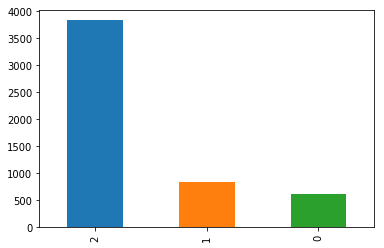

In [5]:
data['sentiment'].value_counts().plot.bar()

In [6]:
# data0=data[data['sentiment']==0]
# data1=data[data['sentiment']==1]
# data2=data[data['sentiment']==2]

# data2=data2.sample(n=data1.shape[0],random_state=seed)
# data0=data0.sample(n=data1.shape[0],replace=True,random_state=seed)

In [7]:
# data=pd.concat([data0,data1,data2],axis=0,ignore_index=True)
data=data.sample(frac=1)

In [8]:
print(data.shape)
print(test.shape)

(5279, 4)
(2924, 3)


In [9]:
data.head()

,unique_hash,text,drug,sentiment
1582,b77fd597d25ef586379df399192a410fadd0e133,The people who are taller (have longer abdomen...,cimzia,2
350,00ff5d5610bb9abd14c14fd2c6adf4cc1208d5bf,Have you tried antihistamines for the itching?...,gilenya,2
1575,8c69d741acf03ae616300f9d74d4aed752acf9d2,"Hi B, It sounds like your dad is in good shape...",opdivo,2
4843,d4cf4ddec1d6cd076b08999e0661422f905bc021,"Hi 'chesty', I have stage IV RCC. I was diagno...",nivolumab,0
3715,27af9b2e3d1b6226944a3176a5fed079719f7d9d,You can see my trajectory over the past 7.5 mo...,inflectra,2


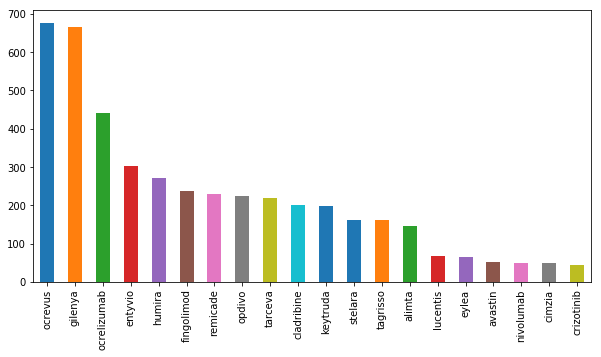

In [10]:
plt.figure(figsize=(10,5))
data['drug'].value_counts()[:20].plot.bar()

In [11]:
data['drug'].nunique()

102

In [12]:
data.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [13]:
test.isnull().sum()

unique_hash    0
text           0
drug           0
dtype: int64

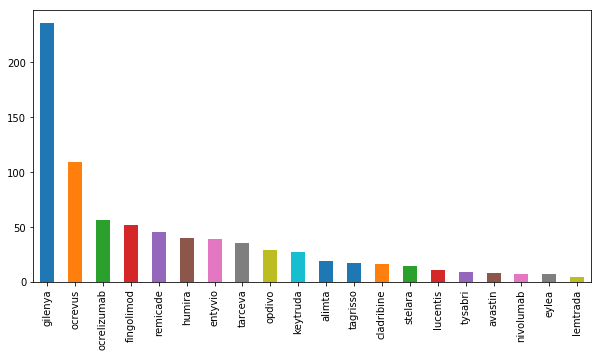

In [14]:
plt.figure(figsize=(10,5))
data[data['sentiment']==1]['drug'].value_counts()[:20].plot.bar()

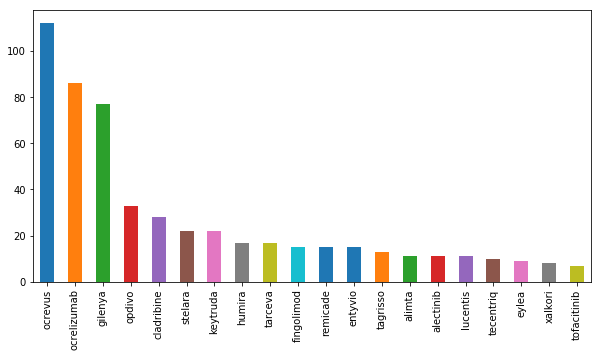

In [15]:
plt.figure(figsize=(10,5))
data[data['sentiment']==0]['drug'].value_counts()[:20].plot.bar()

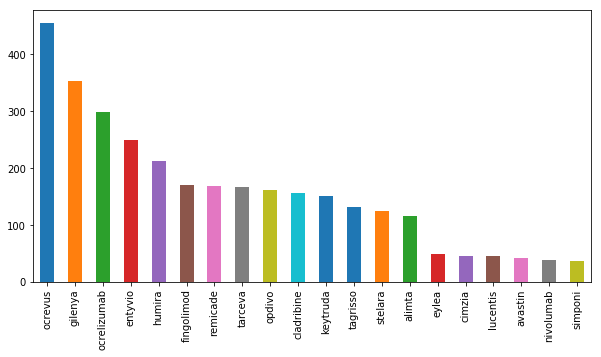

In [16]:
plt.figure(figsize=(10,5))
data[data['sentiment']==2]['drug'].value_counts()[:20].plot.bar()

In [17]:
# data['text']=data['drug']+ ' ' + data['text']
# test['text']=test['drug']+ ' ' + test['text']

In [18]:
# data=data.drop('drug',1)
# test=test.drop('drug',1)

In [19]:
# stop_words=set(stopwords.words('english'))

# def clean_text(row):
#     tokens=word_tokenize(row)
#     filtered_text=[word.lower() for word in tokens if ((word.lower() not in (string.punctuation + '“”’')) & (word.lower() not in stop_words))]
#     return ' '.join(filtered_text)

In [20]:
# data['text']=data['text'].apply(lambda x: clean_text(x))
# test['text']=data['text'].apply(lambda x: clean_text(x))

In [21]:
data.head()

,unique_hash,text,drug,sentiment
1582,b77fd597d25ef586379df399192a410fadd0e133,The people who are taller (have longer abdomen...,cimzia,2
350,00ff5d5610bb9abd14c14fd2c6adf4cc1208d5bf,Have you tried antihistamines for the itching?...,gilenya,2
1575,8c69d741acf03ae616300f9d74d4aed752acf9d2,"Hi B, It sounds like your dad is in good shape...",opdivo,2
4843,d4cf4ddec1d6cd076b08999e0661422f905bc021,"Hi 'chesty', I have stage IV RCC. I was diagno...",nivolumab,0
3715,27af9b2e3d1b6226944a3176a5fed079719f7d9d,You can see my trajectory over the past 7.5 mo...,inflectra,2


In [22]:
def get_wordcloud(data):
    text= ' '.join(data['text'].values)
    wordcloud=WordCloud(background_color='black',max_words=200,max_font_size=60).generate(text)
    plt.figure(figsize=(15,15))
    plt.title('Most common words')
    plt.axis('off')
    plt.imshow(wordcloud)

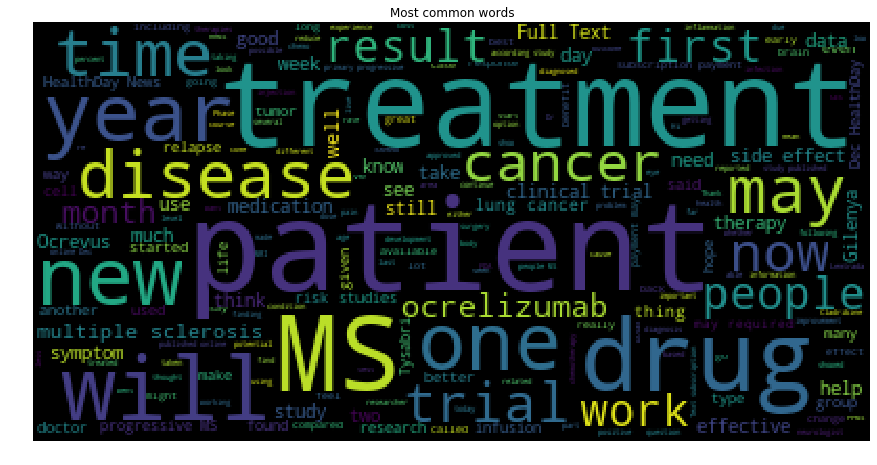

In [23]:
get_wordcloud(data[data['sentiment']==0])

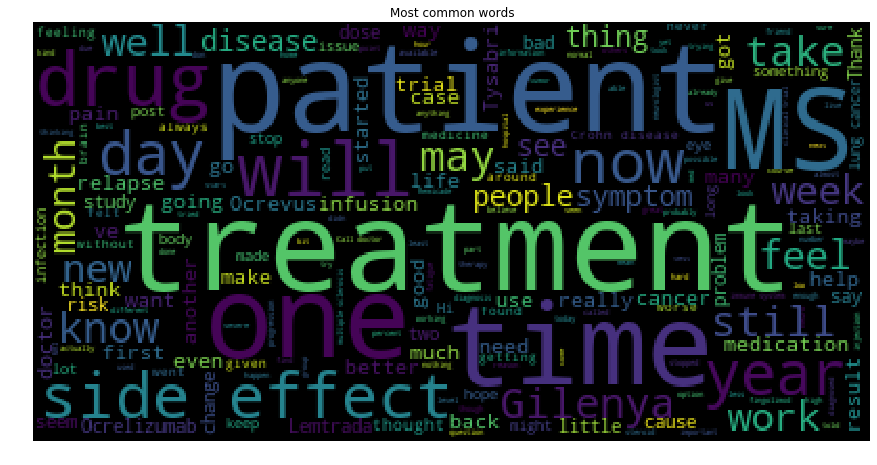

In [24]:
get_wordcloud(data[data['sentiment']==1])

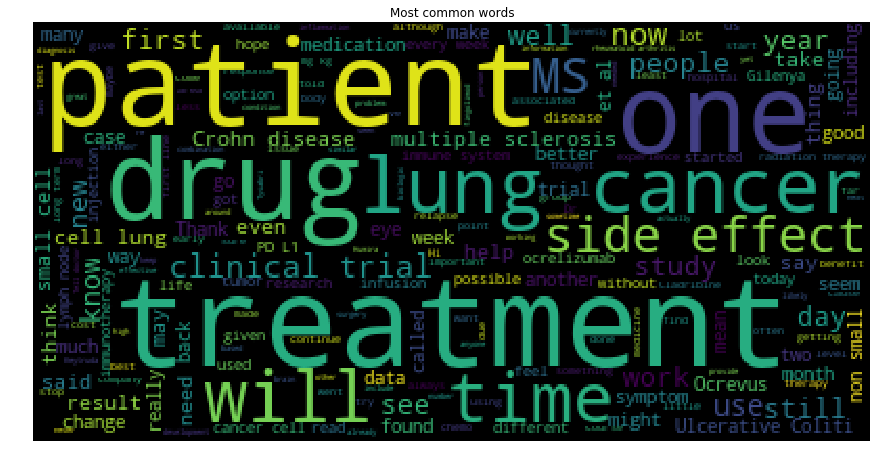

In [25]:
get_wordcloud(data[data['sentiment']==2])

In [26]:
max_features=5000
tfv=TfidfVectorizer()

In [27]:
text_0=' '.join(data.loc[data['sentiment']==0,'text'].values)
text_unigram=[i for i in ngrams(text_0.split(),1)]

In [28]:
Counter(text_unigram).most_common(30)

[(('the',), 6880),
 (('of',), 4821),
 (('to',), 4700),
 (('and',), 4496),
 (('a',), 3510),
 (('in',), 3300),
 (('I',), 2449),
 (('for',), 2244),
 (('is',), 2202),
 (('with',), 2042),
 (('that',), 1936),
 (('on',), 1296),
 (('be',), 1188),
 (('was',), 1157),
 (('or',), 1099),
 (('have',), 1090),
 (('are',), 1090),
 (('it',), 1022),
 (('my',), 965),
 (('as',), 958),
 (('The',), 901),
 (('MS',), 810),
 (('you',), 768),
 (('this',), 747),
 (('at',), 714),
 (('from',), 693),
 (('not',), 686),
 (('patients',), 667),
 (('has',), 604),
 (('but',), 601)]

In [29]:
data['text']=data['text'].apply(lambda x: x.replace("n't",'not'))

In [30]:
test['text']=test['text'].apply(lambda x: x.replace("n't",'not'))

In [31]:
text_1=' '.join(data.loc[data['sentiment']==1,'text'].values)
text_unigram=[i for i in ngrams(text_1.split(),1)]

In [32]:
Counter(text_unigram).most_common(30)

[(('the',), 6527),
 (('to',), 5327),
 (('I',), 5042),
 (('and',), 4935),
 (('of',), 4081),
 (('a',), 3608),
 (('in',), 2671),
 (('is',), 2426),
 (('for',), 2299),
 (('that',), 2182),
 (('with',), 2016),
 (('my',), 1932),
 (('was',), 1728),
 (('it',), 1689),
 (('on',), 1682),
 (('have',), 1653),
 (('you',), 1501),
 (('or',), 1394),
 (('not',), 1218),
 (('be',), 1169),
 (('this',), 1084),
 (('but',), 1057),
 (('are',), 1039),
 (('as',), 979),
 (('had',), 961),
 (('your',), 957),
 (('at',), 771),
 (('if',), 720),
 (('me',), 697),
 (('The',), 689)]

In [33]:
text_2=' '.join(data.loc[data['sentiment']==2,'text'].values)
text_unigram=[i for i in ngrams(text_2.split(),1)]

In [34]:
Counter(text_unigram).most_common(30)

[(('the',), 47716),
 (('of',), 35346),
 (('and',), 33583),
 (('to',), 33449),
 (('in',), 23182),
 (('a',), 22804),
 (('I',), 17071),
 (('for',), 16157),
 (('with',), 14820),
 (('is',), 14544),
 (('that',), 11972),
 (('or',), 10669),
 (('on',), 9309),
 (('have',), 8120),
 (('be',), 7534),
 (('are',), 7268),
 (('was',), 7256),
 (('you',), 7176),
 (('as',), 6792),
 (('it',), 6769),
 (('my',), 6288),
 (('not',), 6271),
 (('The',), 5850),
 (('this',), 5093),
 (('at',), 5076),
 (('your',), 4868),
 (('patients',), 4857),
 (('but',), 4412),
 (('from',), 4307),
 (('by',), 4173)]

In [35]:
text_0=' '.join(data.loc[data['sentiment']==0,'text'].values)
text_bigram=[i for i in ngrams(text_0.split(),2)]

In [36]:
Counter(text_bigram).most_common(30)

[(('of', 'the'), 830),
 (('in', 'the'), 776),
 (('to', 'be'), 293),
 (('for', 'the'), 276),
 (('to', 'the'), 269),
 (('I', 'was'), 263),
 (('may', 'be'), 244),
 (('on', 'the'), 242),
 (('is', 'a'), 238),
 (('I', 'have'), 223),
 (('patients', 'with'), 221),
 (('to', 'a'), 212),
 (('I', 'am'), 191),
 (('and', 'the'), 175),
 (('with', 'the'), 167),
 (('at', 'the'), 163),
 (('according', 'to'), 160),
 (('that', 'the'), 155),
 (('have', 'been'), 152),
 (('people', 'with'), 152),
 (('from', 'the'), 148),
 (('has', 'been'), 146),
 (('with', 'a'), 145),
 (('it', 'is'), 145),
 (('the', 'first'), 144),
 (('(HealthDay', 'News)'), 139),
 (('News)', '--'), 139),
 (('2016', '(HealthDay'), 138),
 (('Full', 'Text'), 138),
 (('and', 'I'), 137)]

In [37]:
text_0=' '.join(data.loc[data['sentiment']==0,'text'].values)
text_trigram=[i for i in ngrams(text_0.split(),3)]

In [38]:
Counter(text_trigram).most_common(30)

[(('(HealthDay', 'News)', '--'), 139),
 (('2016', '(HealthDay', 'News)'), 138),
 (('according', 'to', 'a'), 119),
 (('.', 'Full', 'Text'), 114),
 (('(subscription', 'or', 'payment'), 112),
 (('or', 'payment', 'may'), 112),
 (('payment', 'may', 'be'), 112),
 (('may', 'be', 'required)'), 112),
 (('a', 'study', 'published'), 92),
 (('to', 'a', 'study'), 90),
 (('the', 'treatment', 'of'), 85),
 (('Full', 'Text', '(subscription'), 84),
 (('Text', '(subscription', 'or'), 84),
 (('published', 'online', 'Dec.'), 80),
 (('in', 'patients', 'with'), 71),
 (('study', 'published', 'online'), 67),
 (('for', 'the', 'treatment'), 66),
 (('as', 'well', 'as'), 63),
 (('a', 'lot', 'of'), 55),
 (('the', 'risk', 'of'), 46),
 (('I', 'have', 'been'), 43),
 (('the', 'Journal', 'of'), 42),
 (('one', 'of', 'the'), 42),
 (('for', 'people', 'with'), 40),
 (('published', 'in', 'the'), 38),
 (('of', 'the', 'colon'), 36),
 (('the', 'use', 'of'), 34),
 (('was', 'diagnosed', 'with'), 34),
 (('Food', 'and', 'Drug'), 33

In [39]:
text_1=' '.join(data.loc[data['sentiment']==1,'text'].values)
text_bigram=[i for i in ngrams(text_1.split(),2)]

In [40]:
Counter(text_bigram).most_common(30)

[(('of', 'the'), 667),
 (('in', 'the'), 653),
 (('I', 'was'), 503),
 (('I', 'have'), 460),
 (('I', 'am'), 379),
 (('to', 'be'), 331),
 (('and', 'I'), 299),
 (('to', 'the'), 295),
 (('I', 'had'), 292),
 (('on', 'the'), 253),
 (('for', 'the'), 242),
 (('side', 'effects'), 232),
 (('with', 'the'), 227),
 (('have', 'been'), 220),
 (('you', 'are'), 213),
 (('is', 'a'), 208),
 (('if', 'you'), 196),
 (('it', 'is'), 192),
 (('of', 'my'), 190),
 (('that', 'I'), 180),
 (('to', 'get'), 176),
 (('in', 'a'), 176),
 (('and', 'the'), 175),
 (('you', 'have'), 170),
 (('but', 'I'), 168),
 (('it', 'was'), 160),
 (('your', 'doctor'), 159),
 (('in', 'my'), 157),
 (('for', 'a'), 156),
 (('If', 'you'), 151)]

In [41]:
text_1=' '.join(data.loc[data['sentiment']==1,'text'].values)
text_trigram=[i for i in ngrams(text_1.split(),3)]

In [42]:
Counter(text_trigram).most_common(30)

[(('I', 'have', 'been'), 80),
 (('if', 'you', 'have'), 71),
 (('a', 'lot', 'of'), 59),
 (('I', 'was', 'on'), 54),
 (('I', 'had', 'to'), 51),
 (('I', 'had', 'a'), 47),
 (('Call', 'your', 'doctor'), 46),
 (('if', 'you', 'are'), 45),
 (('I', 'have', 'had'), 42),
 (('If', 'you', 'are'), 42),
 (('Tell', 'your', 'doctor'), 41),
 (('was', 'diagnosed', 'with'), 38),
 (('I', 'need', 'to'), 38),
 (('I', 'have', 'to'), 37),
 (('If', 'you', 'have'), 37),
 (('the', 'side', 'effects'), 36),
 (('one', 'of', 'the'), 35),
 (('be', 'able', 'to'), 35),
 (('I', 'was', 'diagnosed'), 34),
 (('the', 'risk', 'of'), 34),
 (('have', 'been', 'on'), 33),
 (('part', 'of', 'the'), 33),
 (('side', 'effects', 'of'), 32),
 (('your', 'doctor', 'if'), 32),
 (('doctor', 'if', 'you'), 31),
 (('I', 'am', 'not'), 30),
 (('as', 'well', 'as'), 30),
 (("Crohn's", '&', 'Colitis'), 30),
 (('a', 'couple', 'of'), 29),
 (('to', 'see', 'if'), 29)]

In [43]:
text_2=' '.join(data.loc[data['sentiment']==2,'text'].values)
text_trigram=[i for i in ngrams(text_2.split(),3)]

In [44]:
Counter(text_trigram).most_common(30)

[(('in', 'patients', 'with'), 523),
 (('the', 'treatment', 'of'), 458),
 (('if', 'you', 'have'), 360),
 (('as', 'well', 'as'), 341),
 (('cell', 'lung', 'cancer'), 333),
 (('non-small', 'cell', 'lung'), 308),
 (('for', 'the', 'treatment'), 276),
 (('used', 'to', 'treat'), 269),
 (('I', 'have', 'been'), 239),
 (('a', 'lot', 'of'), 231),
 (('one', 'of', 'the'), 220),
 (('the', 'risk', 'of'), 217),
 (('part', 'of', 'the'), 211),
 (('the', 'use', 'of'), 211),
 (('doctor', 'if', 'you'), 202),
 (('for', 'patients', 'with'), 201),
 (('your', 'doctor', 'if'), 196),
 (('if', 'you', 'are'), 195),
 (('the', 'number', 'of'), 194),
 (('(Opens', 'in', 'new'), 192),
 (('in', 'new', 'window)'), 192),
 (('be', 'able', 'to'), 191),
 (('in', 'combination', 'with'), 182),
 (('of', 'patients', 'with'), 181),
 (('in', 'the', 'treatment'), 175),
 (('Tell', 'your', 'doctor'), 165),
 (('a', 'type', 'of'), 160),
 (('is', 'used', 'to'), 160),
 (('If', 'you', 'have'), 158),
 (('small', 'cell', 'lung'), 157)]

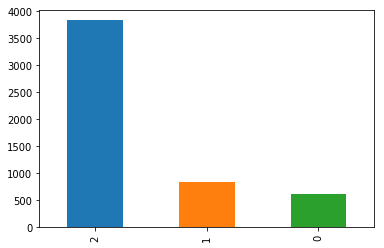

In [45]:
data['sentiment'].value_counts().plot.bar()

In [46]:
data=data.sample(frac=1).reset_index(drop=True)

## Traditional Modelling

In [47]:
# train=data['text']
# target=data['sentiment'].values
# test=test['text']

In [48]:
# tfv=TfidfVectorizer(ngram_range=(1,3),max_features=max_features)
# tfv.fit(list(train.values)+list(test.values))
# train=tfv.transform(train.values)
# test=tfv.transform(test.values)

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder

In [50]:
# mnb=MultinomialNB()
# scores=cross_val_score(mnb,train,target,scoring='f1_macro',cv=10)
# print('The score is ',np.mean(scores))

# The score is  0.29948620660820263

## Deep Learning

In [51]:
from keras.layers import Dense,Bidirectional,CuDNNLSTM,CuDNNGRU,Flatten,Conv1D,Embedding,Dropout,BatchNormalization
from keras.layers import LSTM,GRU,Activation,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate,SpatialDropout1D,Input
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint,Callback, EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model, load_model
from keras.optimizers import Adam
import keras.backend as K
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
import gensim.models.keyedvectors as word2vec
from tqdm import tqdm
tqdm.pandas()

In [52]:
le=LabelEncoder()
le.fit(list(data['drug'].values)+list(test['drug'].values))
data['drug']=le.transform(data['drug'])
test['drug']=le.transform(test['drug'])

In [53]:
train_drug=data['drug']
test_drug=test['drug']

train_text=data['text']
test_text=test['text']

target=data['sentiment']

In [54]:
target=to_categorical(target)

In [55]:
tk=Tokenizer(num_words=max_features)
full_text=list(train_text.values)+list(test_text.values)
tk.fit_on_texts(full_text)
train_tokenized=tk.texts_to_sequences(train_text)
test_tokenized=tk.texts_to_sequences(test_text)

In [56]:
train_text_length=train_text.apply(lambda x: len(x.split()))
print(train_text_length.mean(),  train_text_length.std() )

341.40178064027276 795.1636451628794


In [57]:
max_len=800

train_pad=pad_sequences(train_tokenized,maxlen=max_len)
test_pad=pad_sequences(test_tokenized,maxlen=max_len)

In [58]:
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == '../input/quoratextemb/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index

In [59]:
fasttext_path='../input/quoratextemb/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec'
glove_path='../input/quoratextemb/embeddings/glove.840B.300d/glove.840B.300d.txt'
paragram_path='../input/quoratextemb/embeddings/paragram_300_sl999/paragram_300_sl999.txt'

In [60]:
fasttext_index=load_embed(fasttext_path)
glove_index=load_embed(glove_path)
paragram_index=load_embed(paragram_path)

In [61]:
def build_vocab(sentences):
    vocab={}
    for sentence in tqdm(sentences):
        for word in sentence:
            try:
                vocab[word]+=1
            except KeyError:
                vocab[word]=1
    return vocab

In [62]:
sentences=data['text'].progress_apply(lambda x: x.split()).values
vocab=build_vocab(sentences)

print({k:vocab[k] for k in list(vocab.keys())[:5]})

100%|██████████| 5279/5279 [00:00<00:00, 12606.12it/s]

{'Hi': 606, 'Susan,': 1, 'Really': 18, 'interested': 100, 'in': 29153}


In [63]:
def coverage(vocab,embedding_index):
    intersection={}
    i=0
    oov={}
    o=0
    
    for word in tqdm(vocab.keys()):
        try:
            intersection[word]=embedding_index[word]
            i+=vocab[word]
        except:
            oov[word]=vocab[word]
            o+=vocab[word]
    print(f'Embeddings found for {len(intersection)*100/len(vocab)} of vocab')
    print(f'Embeddings found for {i*100/(i+o)} of text')
    oov=sorted(oov.items(),key=lambda x:x[1],reverse=True)
    return oov

In [64]:
print('Fasttext:')
fasttext_oov=coverage(vocab,fasttext_index)
print('Glove:')
glove_oov=coverage(vocab,glove_index)
print('Paragram:')
paragram_oov=coverage(vocab,paragram_index)

  0%|          | 0/105176 [00:00<?, ?it/s]

Fasttext:
Embeddings found for 39.58507644329505 of vocab
Embeddings found for 87.74621863660072 of text
Glove:


100%|██████████| 105176/105176 [00:00<00:00, 867056.46it/s]

Embeddings found for 41.49045409599148 of vocab
Embeddings found for 87.89503179341493 of text
Paragram:
Embeddings found for 26.82741309804518 of vocab
Embeddings found for 75.3090564069557 of text


In [65]:
data['lowered_text']=data['text'].apply(lambda x: x.lower())

In [66]:
sentences=data['lowered_text'].progress_apply(lambda x: x.split()).values
lowered_vocab=build_vocab(sentences)


100%|██████████| 5279/5279 [00:00<00:00, 12921.68it/s]


In [67]:
print('Fasttext:')
fasttext_oov=coverage(lowered_vocab,fasttext_index)
print('Glove:')
glove_oov=coverage(lowered_vocab,glove_index)
print('Paragram:')
paragram_oov=coverage(lowered_vocab,paragram_index)

  0%|          | 0/93413 [00:00<?, ?it/s]

Fasttext:
Embeddings found for 33.922473317418344 of vocab
Embeddings found for 86.76356352579539 of text
Glove:


100%|██████████| 93413/93413 [00:00<00:00, 828964.31it/s]

Embeddings found for 36.204810893558715 of vocab
Embeddings found for 87.24468167744942 of text
Paragram:
Embeddings found for 38.45824456981362 of vocab
Embeddings found for 88.07569385105367 of text


In [68]:
def add_lower(embedding, vocab):
    count = 0
    for word in vocab:
        if word in embedding and word.lower() not in embedding:  
            embedding[word.lower()] = embedding[word]
            count += 1
    print(f"Added {count} words to embedding")

In [69]:
print("Glove : ")
add_lower(glove_index, vocab)
print("Paragram : ")
add_lower(paragram_index, vocab)
print("FastText : ")
add_lower(fasttext_index, vocab)

Glove : 
Added 1971 words to embedding
Paragram : 
Added 1 words to embedding
FastText : 
Added 2782 words to embedding


In [70]:
print('Fasttext:')
fasttext_oov=coverage(lowered_vocab,fasttext_index)
print('Glove:')
glove_oov=coverage(lowered_vocab,glove_index)
print('Paragram:')
paragram_oov=coverage(lowered_vocab,paragram_index)

100%|██████████| 93413/93413 [00:00<00:00, 813496.14it/s]

Fasttext:



  0%|          | 0/93413 [00:00<?, ?it/s]

Embeddings found for 36.90064552043078 of vocab
Embeddings found for 88.0478399343047 of text
Glove:


  0%|          | 0/93413 [00:00<?, ?it/s]

Embeddings found for 38.31479558519692 of vocab
Embeddings found for 88.05799385216339 of text
Paragram:


100%|██████████| 93413/93413 [00:00<00:00, 848840.10it/s]

Embeddings found for 38.459315084624194 of vocab
Embeddings found for 88.07580482283355 of text


In [71]:
fasttext_oov[:15]

[('i’m', 1406),
 ("i'm", 1252),
 ('it’s', 1171),
 ("crohn's", 1113),
 ('ocrevus', 931),
 ("it's", 913),
 ('however,', 807),
 ('don’t', 724),
 ('i’ve', 662),
 ("i've", 572),
 ('entyvio', 504),
 ('cancer,', 442),
 ('ms,', 420),
 ('disease,', 406),
 ('treatment,', 381)]

In [72]:
glove_oov[:15]

[('–', 1464),
 ('i’m', 1406),
 ('it’s', 1171),
 ("crohn's", 1113),
 ('ocrevus', 931),
 ('however,', 807),
 ('don’t', 724),
 ('i’ve', 662),
 ('entyvio', 504),
 ('cancer,', 442),
 ('ms,', 420),
 ('keytruda', 417),
 ('disease,', 406),
 ('treatment,', 381),
 ('opdivo', 380)]

In [73]:
paragram_oov[:15]

[('–', 1464),
 ('i’m', 1406),
 ('it’s', 1171),
 ("crohn's", 1113),
 ('ocrevus', 931),
 ('however,', 807),
 ('don’t', 724),
 ('i’ve', 662),
 ('entyvio', 504),
 ('cancer,', 442),
 ('ms,', 420),
 ('keytruda', 417),
 ('disease,', 406),
 ('treatment,', 381),
 ('opdivo', 380)]

In [74]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would",
                       "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have",
                       "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
                       "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
                       "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                       "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                       "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [75]:
def known_contractions(embed):
    known = []
    for contract in contraction_mapping:
        if contract in embed:
            known.append(contract)
    return known

In [76]:
print("- Known Contractions -")
print("   Glove :")
print(known_contractions(glove_index))
print("   Paragram :")
print(known_contractions(paragram_index))
print("   FastText :")
print(known_contractions(fasttext_index))

- Known Contractions -
   Glove :
["can't", "'cause", "didn't", "doesn't", "don't", "I'd", "I'll", "I'm", "I've", "i'd", "i'll", "i'm", "i've", "it's", "ma'am", "o'clock", "that's", "you'll", "you're"]
   Paragram :
["can't", "'cause", "didn't", "doesn't", "don't", "i'd", "i'll", "i'm", "i've", "it's", "ma'am", "o'clock", "that's", "you'll", "you're"]
   FastText :
[]


In [77]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [78]:
data['treated_text'] = data['lowered_text'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [79]:
sentences=data['treated_text'].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print("Glove : ")
oov_glove = coverage(vocab, glove_index)
print("Paragram : ")
oov_paragram = coverage(vocab, paragram_index)
print("FastText : ")
oov_fasttext = coverage(vocab, fasttext_index)

  0%|          | 0/93072 [00:00<?, ?it/s]

Glove : 
Embeddings found for 38.45732336255802 of vocab
Embeddings found for 88.61184895539073 of text
Paragram : 


100%|██████████| 93072/93072 [00:00<00:00, 861423.75it/s]

Embeddings found for 38.60344679388 of vocab
Embeddings found for 88.62959763953525 of text
FastText : 
Embeddings found for 37.0444387141138 of vocab
Embeddings found for 88.80333631165807 of text


In [80]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

In [81]:
def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

In [82]:
print("Glove :")
print(unknown_punct(glove_index, punct))
print("Paragram :")
print(unknown_punct(paragram_index, punct))
print("FastText :")
print(unknown_punct(fasttext_index, punct))

Glove :
“ ” ’ ∞ θ ÷ α • à − β ∅ ³ π ‘ ₹ ´ ° £ € × ™ √ ² — – 
Paragram :
“ ” ’ ∞ θ ÷ α • à − β ∅ ³ π ‘ ₹ ´ ° £ € × ™ √ ² — – 
FastText :
_ ` 


In [83]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-",
                 "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 
                 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '►':' ','®':'registered trademark ',
                 'â':'a','»':' ','±':'+ -','âe':'e','1â':' ','≥':'> =','‡':'reference mark','🙂':'smile','2â':' ','·':'-',
                 '†':'reference mark','rebif®':'rebif','©':'copyright trademark','≥6':'> = 6','gilenya®':'gilenya','§':' ','8â':' ',
                }

In [84]:
def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [85]:
data['treated_text'] = data['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [86]:
sentences=data['treated_text'].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print("Glove : ")
oov_glove = coverage(vocab,glove_index)
print("Paragram : ")
oov_paragram = coverage(vocab, paragram_index)
print("FastText : ")
oov_fasttext = coverage(vocab, fasttext_index)

100%|██████████| 41359/41359 [00:00<00:00, 868903.40it/s]


Glove : 
Embeddings found for 83.1935008099809 of vocab
Embeddings found for 98.92154760779981 of text
Paragram : 


100%|██████████| 41359/41359 [00:00<00:00, 869896.84it/s]

Embeddings found for 85.27769046640393 of vocab
Embeddings found for 99.01225898119817 of text
FastText : 
Embeddings found for 78.53429725090065 of vocab
Embeddings found for 98.7410787612742 of text


In [87]:
oov_paragram[:100]

[('ocrevus', 1321),
 ('entyvio', 677),
 ('keytruda', 618),
 ('opdivo', 587),
 ('pembrolizumab', 455),
 ('tagrisso', 433),
 ('nivolumab', 427),
 ('tecfidera', 387),
 ('ros1', 318),
 ('osimertinib', 262),
 ('vedolizumab', 171),
 ('alectinib', 158),
 ('atezolizumab', 135),
 ('siponimod', 135),
 ('durvalumab', 129),
 ('trametinib', 128),
 ('uceris', 126),
 ('cancergrace', 124),
 ('wonot', 115),
 ('ceritinib', 115),
 ('tecentriq', 112),
 ('mavenclad', 106),
 ('proctosigmoiditis', 98),
 ('dabrafenib', 96),
 ('inflectra', 77),
 ('ozanimod', 76),
 ('75mgs', 71),
 ('inflectratm', 66),
 ('ibdsuperheroes', 65),
 ('renflexis', 61),
 ('brigatinib', 58),
 ('upadacitinib', 56),
 ('imfinzi', 53),
 ('ileorectal', 50),
 ('mymsteam', 49),
 ('catdander', 49),
 ('pdl1', 47),
 ('iraes', 46),
 ('dyyb', 45),
 ('risankizumab', 44),
 ('5asas', 43),
 ('healingwell', 43),
 ('baf312', 41),
 ('qbtx', 40),
 ('actrims', 39),
 ('rebifregistered', 39),
 ('azd9291', 37),
 ('mekinist', 36),
 ('mymsaa', 36),
 ('3755226', 

In [88]:
# def get_embeddings(embedding_index):
#     embedding_stack=np.stack(embedding_index.values())
#     embed_mean,embed_std=embedding_stack.mean(),embedding_stack.std()
#     embedding_matrix=np.random.normal(embed_mean,embed_std,())

In [89]:
# word2vecDict = word2vec.KeyedVectors.load_word2vec_format(embedding_path, 
#                                                           binary=True)

# embedding_index=dict()
# for word in word2vecDict.wv.vocab:
#     embedding_index[word]=word2vecDict.word_vec(word)
    
    
# print('Length of embedding_index:',len(embedding_index))

In [90]:
# oov=coverage(vocab,embedding_index)

In [91]:
# oov[:15]

In [92]:
# for punct in string.punctuation:
#     print(punct, punct in embedding_index)

In [93]:
# # def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
# # embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

# word_index = tk.word_index
# nb_words = min(max_features, len(word_index))
# embedding_stack=np.stack(list(embedding_index.values()))
# embed_mean, embed_std= embedding_stack.mean(),embedding_stack.std()
# embedding_matrix = np.random.normal(embed_mean,embed_std,(nb_words+1,embedding_stack.shape[1]))
# j=0
# for word, i in word_index.items():
#     if i > nb_words:
#         j+=1
#     else:
#         embedding_vector = embedding_index.get(word)
#         if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [94]:
# print(j)

In [95]:
# text_embed_size=embedding_stack.shape[1]
# drug_embed_size=8

In [96]:
# from keras import backend as K

# def f1(y_true, y_pred):
#     def recall(y_true, y_pred):
#         """Recall metric.

#         Only computes a batch-wise average of recall.

#         Computes the recall, a metric for multi-label classification of
#         how many relevant items are selected.
#         """
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#         recall = true_positives / (possible_positives + K.epsilon())
#         return recall

#     def precision(y_true, y_pred):
#         """Precision metric.

#         Only computes a batch-wise average of precision.

#         Computes the precision, a metric for multi-label classification of
#         how many selected items are relevant.
#         """
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision
#     precision = precision(y_true, y_pred)
#     recall = recall(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [97]:
# def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
#     file_path = "best_model.hdf5"
#     check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
#                                   save_best_only = True, mode = "min")
#     early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10)
    
# #     drug_inp = Input(shape = (1,))
#     text_inp=Input(shape=(max_len,))
#     text_embedding = Embedding(embedding_matrix.shape[0], text_embed_size,weights=[embedding_matrix],trainable=False)(text_inp)
# #     drug_embedding= Embedding(train_drug.nunique()+1, drug_embed_size,input_length=1)(drug_inp)
# #     x=concatenate([text_embedding,drug_embedding])
#     x1 = SpatialDropout1D(spatial_dr)(text_embedding)

#     x_gru = Bidirectional(CuDNNGRU(units, return_sequences = True))(x1)
#     x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
#     avg_pool1_gru = GlobalAveragePooling1D()(x1)
#     max_pool1_gru = GlobalMaxPooling1D()(x1)
    
#     x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
#     avg_pool3_gru = GlobalAveragePooling1D()(x3)
#     max_pool3_gru = GlobalMaxPooling1D()(x3)
    
#     x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x1)
#     x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
#     avg_pool1_lstm = GlobalAveragePooling1D()(x1)
#     max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
#     x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
#     avg_pool3_lstm = GlobalAveragePooling1D()(x3)
#     max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    
#     x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,
#                     avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
#     x = BatchNormalization()(x)
#     x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
#     x = BatchNormalization()(x)
#     x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
#     x = Dense(3, activation = "sigmoid")(x)
#     model = Model(inputs = text_inp, outputs = x)
#     model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
#     history = model.fit(train_pad, target, batch_size = 128, epochs = 50, validation_split=0.1, 
#                         verbose = 1, callbacks = [check_point, early_stop])
#     model = load_model(file_path)
#     return model

In [98]:
# model1 = build_model1(lr = 1e-3, lr_d = 1e-10, units = 64, spatial_dr = 0.3, kernel_size1=3, kernel_size2=2, dense_units=32, dr=0.1, conv_size=32)

In [99]:
# pred=model1.predict(test_pad,batch_size=512,verbose=1)
# predictions=np.argmax(pred,axis=1)
# sub=pd.read_csv('../input/innoplexusav/sample.csv')

In [100]:
# sub['sentiment']=predictions
# sub.to_csv('third_submission.csv',index=False)

In [101]:
# sub['sentiment'].value_counts().plot.bar()